In [217]:
import math
import torch
import numpy as np
from torch.optim.lr_scheduler import LambdaLR
import matplotlib.pyplot as plt

# Attempt 1

In [247]:
def custom_lr_scheduler(optimizer, warmup_iterations, total_iterations, starting_iter):
    def lr_lambda(iteration):
        iteration += starting_iter
        if iteration < warmup_iterations:
            return 1
        if iteration < total_iterations:
            cosine_decay = 0.5 * (1 + math.cos(
                math.pi * (iteration - warmup_iterations) / (total_iterations - warmup_iterations)))
            return 0.95 + 0.05 * cosine_decay
        else:
            return 0.95
    return LambdaLR(optimizer, lr_lambda)

beta = torch.tensor(0.0, requires_grad=False)
optimizer = torch.optim.SGD([beta], lr=1)
scheduler = custom_lr_scheduler(optimizer, 0, 100000, starting_iter=50000)

In [248]:
X = np.arange(1000000)

In [249]:
Y = []
for i in range(1000000):
    optimizer.step()
    beta = scheduler.get_last_lr()
    Y.append(beta)
    scheduler.step()

[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.95]


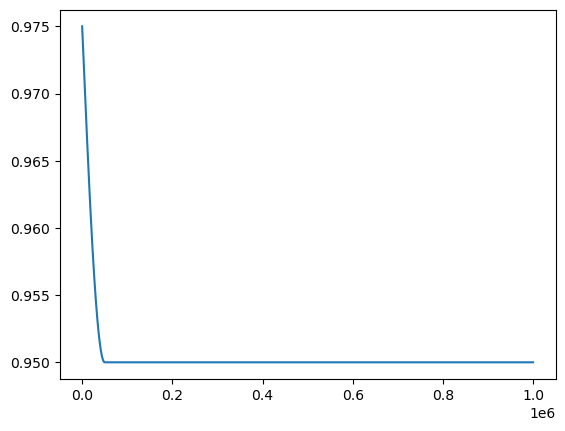

In [250]:
plt.plot(X, Y)
print(Y[50000])
print(Y[100000])
print(Y[150000])
print(Y[200000])
print(Y[300000])
print(Y[400000])
print(Y[500000])
print(Y[600000])

In [259]:
print(Y[56000])

[0.95]
